In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
print('STOCK PREDICTION USING RNN LSTM')
import numpy as np
import pandas as pd
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import LSTM
from keras.layers import  Dropout
from keras.models import model_from_json
from keras.models import load_model
from keras import regularizers

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)

import math
from sklearn import preprocessing
%matplotlib inline

STOCK PREDICTION USING RNN LSTM


In [ ]:
final_Dataset = pd.read_csv('/gdrive/MyDrive/Intelligent Systems/Project(Models, Dataset)/training_final_Dataset - training_final_Dataset.csv')
final_Dataset.head(10)

,Date,Tweet Sentiment Score,news sentiment,Opening Price,Closing Price,avg_sentiment
0,2021-01-01,0.229370,-0.063633,133.520004,129.410004,0.250257
1,2021-01-02,0.249627,-0.028892,133.520004,129.410004,0.250257
2,2021-01-03,0.266743,-0.018815,133.520004,129.410004,0.250257
3,2021-01-04,0.201619,0.044697,133.520004,129.410004,0.250257
4,2021-01-05,0.162208,0.047136,128.889999,131.009995,0.250257
5,2021-01-06,0.145206,0.072986,127.720001,126.599998,0.250257
6,2021-01-07,0.259574,0.069602,128.360001,130.919998,0.250257
7,2021-01-08,0.165197,0.061191,132.429993,132.050003,0.250257
8,2021-01-09,0.027719,0.055661,129.190002,128.979996,0.250257
9,2021-01-10,0.057344,0.056894,129.190002,128.979996,0.250257


## Trying the LSTM model

In [ ]:
final_Dataset.shape

(763, 6)

In [ ]:
final_Dataset=final_Dataset.iloc[0:729]

In [ ]:
closing_Price = final_Dataset['Closing Price']

Text(0, 0.5, 'Price')

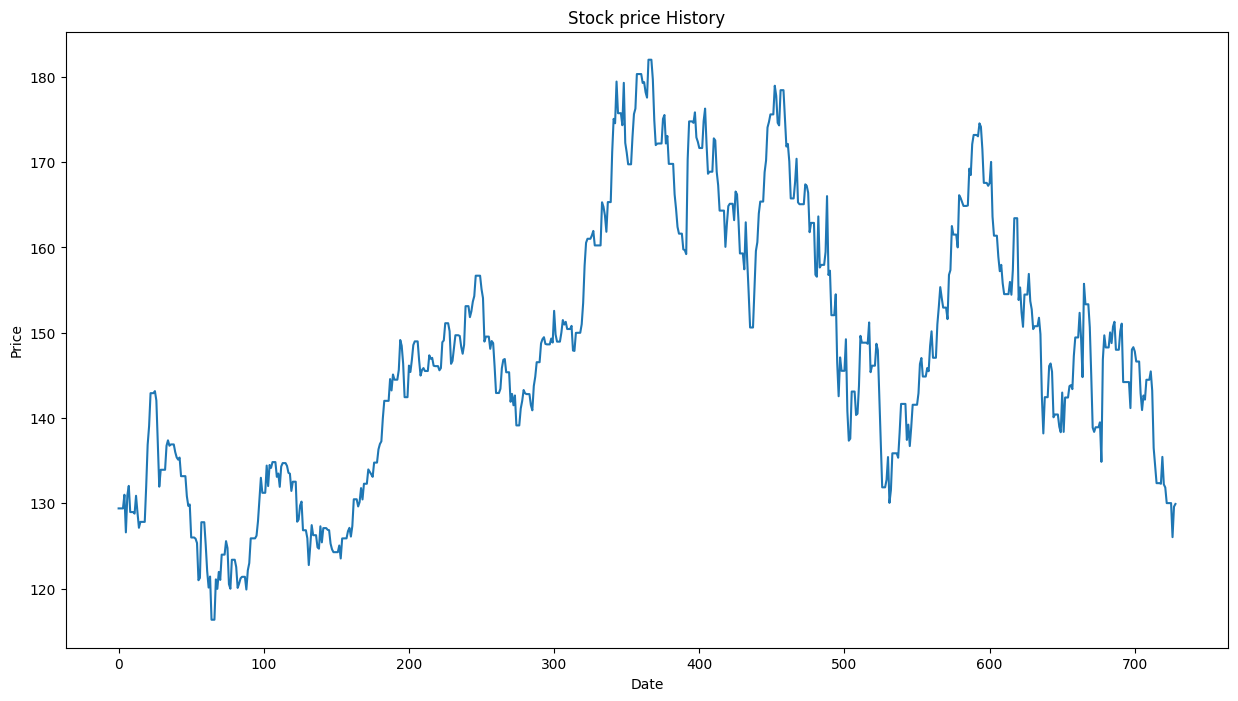

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Stock price History')
plt.plot(final_Dataset['Closing Price'])
plt.xlabel('Date')
plt.ylabel('Price')


From the above you see that the averageing technique to fill up the days where there is no data on the stock price is not working and might throw the model off. Hence it is important to find another method to get the weekly averages. 

## CNN-LSTM Model

In [ ]:
import datetime
import time
X = []
Y = []
window_size = 100
num_features = 4

for i in range(0, len(final_Dataset) - window_size - 1, 1):
    first = final_Dataset.iloc[i, 3]  # opening price
    temp = []
    temp2 = []
    for j in range(window_size):
        date = final_Dataset.iloc[i + j, 0]
        date_obj = datetime.datetime.strptime(date, "%Y-%m-%d")
        date_obj = int(time.mktime(date_obj.timetuple()))
        sentiment1 = final_Dataset.iloc[i + j, 1]
        sentiment2 = final_Dataset.iloc[i + j, 2]
        normalized_sentiment1 = (sentiment1 - np.mean(final_Dataset['Tweet Sentiment Score'])) / np.std(final_Dataset['Tweet Sentiment Score'])
        normalized_sentiment2 = (sentiment2 - np.mean(final_Dataset['news sentiment'])) / np.std(final_Dataset['news sentiment'])
        opening_price_change= (final_Dataset.iloc[i + j, 3] - first) / first
        temp.append([date_obj, normalized_sentiment1, normalized_sentiment2, opening_price_change])
    temp2.append((final_Dataset.iloc[i + window_size, 3] - first) / first)
    X.append(np.array(temp).reshape(window_size, num_features))
    Y.append(np.array(temp2).reshape(1, 1))



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,num_features)
test_X = test_X.reshape(test_X.shape[0],1,100,num_features)

print(len(train_X))
print(len(test_X))
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

502
126
(502, 1, 100, 4)
(126, 1, 100, 4)
(502, 1, 1)
(126, 1, 1)


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 4))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=500,batch_size=40, verbose=1, shuffle =True)


KeyboardInterrupt: ignored

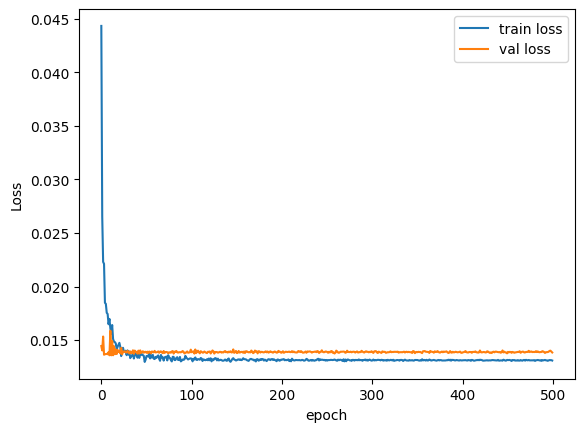

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

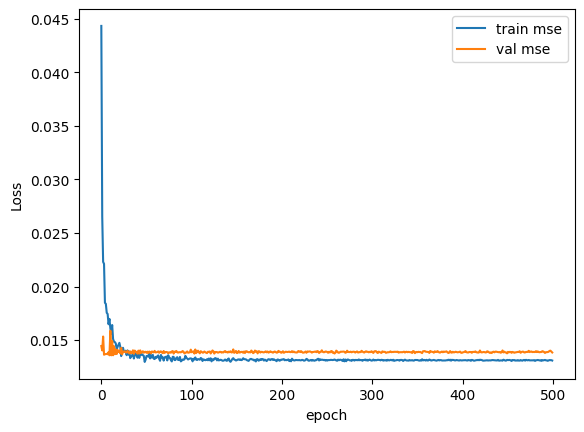

In [ ]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.000000
R2 Score: 0.000000
Max Error: 0.233278


4/4 [==============================] - 0s 13ms/step


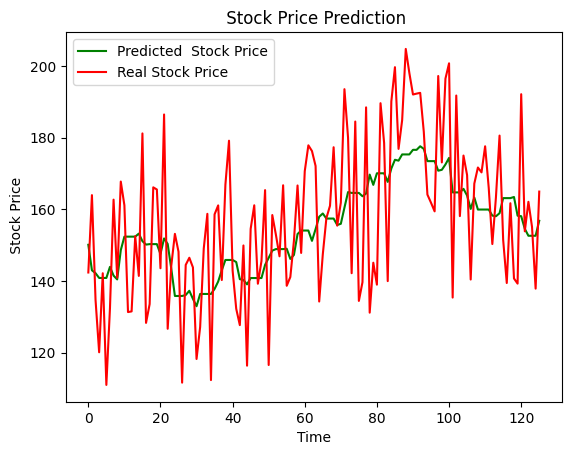

In [ ]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = final_Dataset.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
#plt.plot(closing_Price, color = 'blue', label = 'Predicted  Stock Price')
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [ ]:
training_data_len = math.ceil(len(final_Dataset)*0.8)
col=['Date','Opening Price','avg_sentiment']
y = final_Dataset['Closing Price']
x = final_Dataset[col]

In [ ]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , training_data_len - window_size -1 , 1):
    first = final_Dataset.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((final_Dataset.iloc[i + j, 2] - first) / first)
    temp2.append((final_Dataset.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))
print(train_X.shape)
print(test_X.shape)


407
102
(407, 1, 100, 1)
(102, 1, 100, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=200,batch_size=40, verbose=1, shuffle =True)


Epoch 1/200
11/11 [==============================] - 23s 618ms/step - loss: 0.0477 - mse: 0.0477 - mae: 0.0989 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0465
Epoch 2/200
11/11 [==============================] - 1s 126ms/step - loss: 0.0112 - mse: 0.0112 - mae: 0.0572 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0358
Epoch 3/200
11/11 [==============================] - 1s 101ms/step - loss: 0.0075 - mse: 0.0075 - mae: 0.0486 - val_loss: 0.0025 - val_mse: 0.0025 - val_mae: 0.0424
Epoch 4/200
11/11 [==============================] - 1s 78ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0385 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0275
Epoch 5/200
11/11 [==============================] - 1s 46ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0402 - val_loss: 0.0024 - val_mse: 0.0024 - val_mae: 0.0389
Epoch 6/200
11/11 [==============================] - 1s 48ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0367 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0296
Epoch 7/200


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

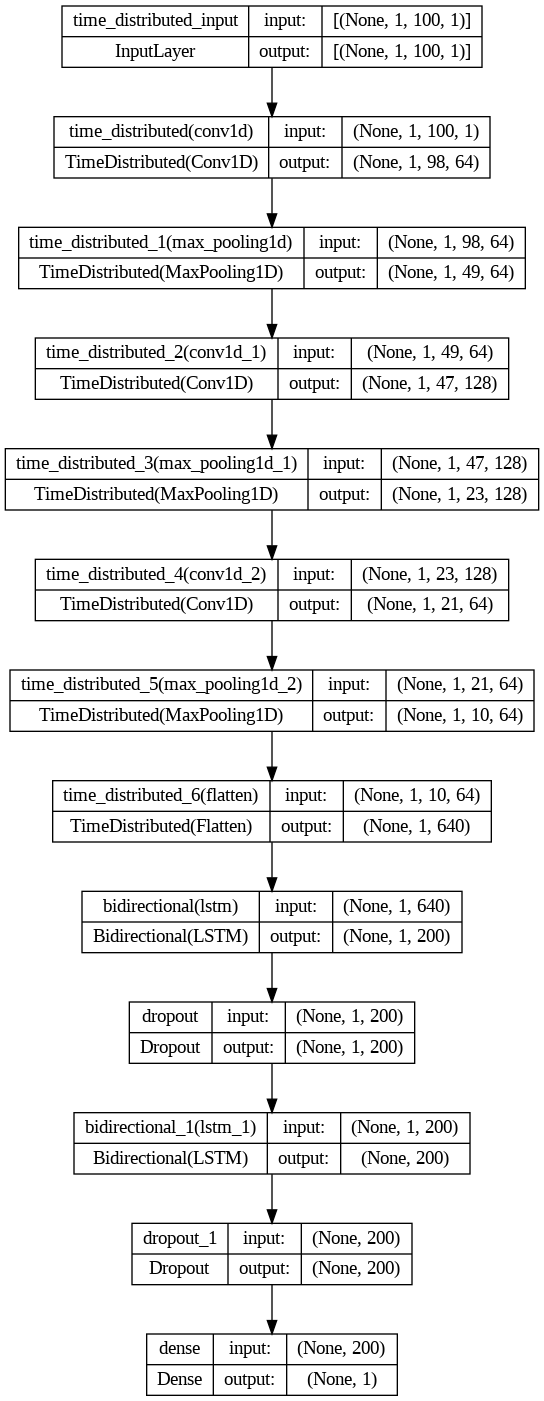

In [ ]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='/gdrive/MyDrive/Intelligent Systems/Project(Models, Dataset)/model.png', show_shapes=True, show_layer_names=True)

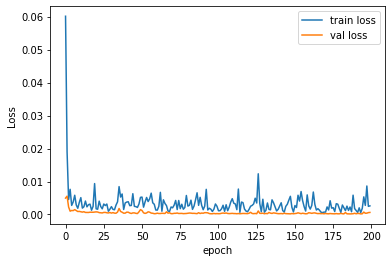

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 13ms/step - loss: 6.2356e-04 - mse: 6.2356e-04 - mae: 0.0202


[0.000623562082182616, 0.000623562082182616, 0.020156510174274445]

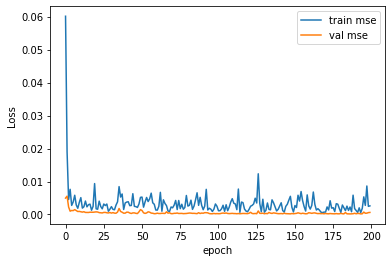

In [ ]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.967520
R2 Score: 0.967520
Max Error: 0.057764


4/4 [==============================] - 0s 15ms/step


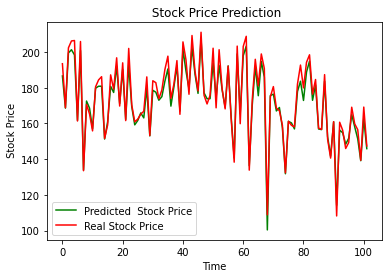

In [ ]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = final_Dataset.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
#plt.plot(closing_Price, color = 'blue', label = 'Predicted  Stock Price')
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [ ]:
model.save('/gdrive/MyDrive/Intelligent Systems/Project(Models, Dataset)/CNN_LSTM_Training_model1.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('/gdrive/MyDrive/Intelligent Systems/Project(Models, Dataset)/CNN_LSTM_Training_model1.h5')